In [1]:
# importing packages needed for the analysis

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#read dataset

df = pd.read_csv('DATASET.CSV')

In [3]:
#understanding the data contained within the dateset 

df.describe(include='all')

,event_id,session_id,user_id,variation,platform,datetime_event,event_type,final_order_status,shop_id
count,3.269210e+05,3.269210e+05,326921.000000,326921.000000,326921,326921,326921,170632,315842.000000
unique,NaN,NaN,NaN,NaN,2,324699,4,3,NaN
top,NaN,NaN,NaN,NaN,Android,2024-11-29 23:59:24.000000000,entry_to_shop,successful,NaN
freq,NaN,NaN,NaN,NaN,225929,674,168215,146035,NaN
mean,5.497122e+07,5.493267e+06,550159.163290,1.349684,NaN,NaN,NaN,NaN,5440.652238
std,2.600573e+07,2.598274e+06,259722.459324,0.476871,NaN,NaN,NaN,NaN,2645.409437
min,1.000003e+07,1.000058e+06,100003.000000,1.000000,NaN,NaN,NaN,NaN,1003.000000
25%,3.245132e+07,3.246170e+06,325736.000000,1.000000,NaN,NaN,NaN,NaN,3150.000000
50%,5.491906e+07,5.486265e+06,549509.000000,1.000000,NaN,NaN,NaN,NaN,5351.000000
75%,7.750492e+07,7.742072e+06,775308.000000,2.000000,NaN,NaN,NaN,NaN,7801.000000


In [4]:
df.isnull().sum()

event_id                   0
session_id                 0
user_id                    0
variation                  0
platform                   0
datetime_event             0
event_type                 0
final_order_status    156289
shop_id                11079
dtype: int64

In [5]:
df.head(10)

,event_id,session_id,user_id,variation,platform,datetime_event,event_type,final_order_status,shop_id
0,63527610,6391574,762832,2,Android,2024-11-30 16:23:46.391133804,entry_to_shop,successful,8531.0
1,12446736,6391574,762832,2,Android,2024-11-30 16:26:16.875713965,order_paid,successful,8531.0
2,90232698,6391574,762832,2,Android,2024-11-30 16:50:44.827088753,order_finished,successful,8531.0
3,74183469,9246026,762832,2,Android,2024-11-29 13:21:28.729203894,reload_the_page,NaN,6186.0
4,16360628,9246026,762832,2,Android,2024-11-29 13:21:35.213637901,entry_to_shop,NaN,6186.0
5,87975585,9457939,762832,2,Android,2024-11-28 23:59:24.000000000,entry_to_shop,NaN,6742.0
6,79159985,9929810,762832,2,Android,2024-11-28 17:42:49.168897336,entry_to_shop,successful,9082.0
7,53691402,9929810,762832,2,Android,2024-11-28 17:44:13.997949301,order_paid,successful,9082.0
8,82931550,9929810,762832,2,Android,2024-11-28 18:26:52.314669424,order_finished,successful,9082.0
9,15277830,2243403,762832,2,Android,2024-11-27 19:15:36.039874766,entry_to_shop,NaN,1331.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326921 entries, 0 to 326920
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id            326921 non-null  int64  
 1   session_id          326921 non-null  int64  
 2   user_id             326921 non-null  int64  
 3   variation           326921 non-null  int64  
 4   platform            326921 non-null  object 
 5   datetime_event      326921 non-null  object 
 6   event_type          326921 non-null  object 
 7   final_order_status  170632 non-null  object 
 8   shop_id             315842 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 22.4+ MB


In [7]:
#Unique session count by platform and variation
session_count = df.groupby(['platform', 'variation'])['session_id'].nunique().reset_index()

session_count.columns = ['platform', 'variation', 'unique_session_count']

print(session_count)

  platform  variation  unique_session_count
0  Android          1                 81458
1  Android          2                 43997
2      iOS          1                 35131
3      iOS          2                 18708


In [8]:
#Users count by platform and variation
user_count = df.groupby(['platform', 'variation'])['user_id'].count() #nunique().reset_index()

user_count.columns = ['platform', 'variation', 'unique_user_count']

print(user_count)

platform  variation
Android   1            146777
          2             79152
iOS       1             65825
          2             35167
Name: user_id, dtype: int64


In [9]:
#Unique Users count by platform and variation
unique_user_count = df.groupby(['platform', 'variation'])['user_id'].nunique().reset_index()

unique_user_count.columns = ['platform', 'variation', 'unique_user_count']

print(unique_user_count)

  platform  variation  unique_user_count
0  Android          1              45454
1  Android          2              24541
2      iOS          1              19546
3      iOS          2              10459


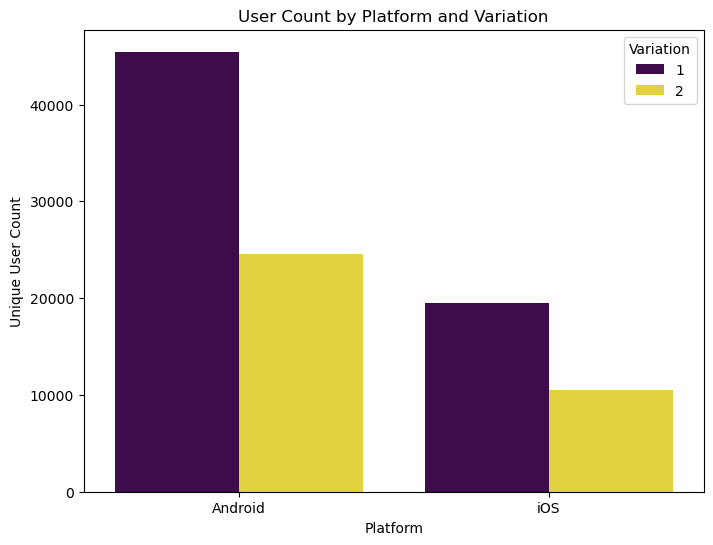

In [11]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(
    x='platform', 
    y='unique_user_count', 
    hue='variation', 
    data=unique_user_count, 
    palette='viridis'
)

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Unique User Count')
plt.title('User Count by Platform and Variation')
plt.legend(title='Variation')

# Show plot
plt.show()


In [12]:
#User count by platform and variation

filtered_df = df[(df['event_type'] == 'order_finished')]

user_count = filtered_df.groupby(['platform', 'variation'])['user_id'].nunique().reset_index()

user_count.columns = ['platform', 'variation', 'user_count']

print(user_count)

  platform  variation  user_count
0  Android          1       18782
1  Android          2       10033
2      iOS          1        8786
3      iOS          2        4737


In [13]:
# Count of User by platform, variation with Successful order
filtered_df = df[(df['event_type'] == 'order_finished') & (df['final_order_status'] == 'successful')]

# Group by platform, variation, and final_order_status, then count distinct user_id
user_count_successful = filtered_df.groupby(['platform', 'variation', 'final_order_status'])['user_id'].nunique().reset_index()

user_count_successful.columns = ['platform', 'variation', 'final_order_status', 'user_count']

print(user_count_successful)


  platform  variation final_order_status  user_count
0  Android          1         successful       16260
1  Android          2         successful        9043
2      iOS          1         successful        7650
3      iOS          2         successful        4314


In [14]:
# Count of User by platform, variation with Cancelled order
filtered_df = df[(df['event_type'] == 'order_finished') & (df['final_order_status'] == 'cancelled')]

# Group by platform, variation, and final_order_status, then count distinct user_id
user_count_cancelled = filtered_df.groupby(['platform', 'variation', 'final_order_status'])['user_id'].nunique().reset_index()

user_count_cancelled.columns = ['platform', 'variation', 'final_order_status', 'user_count']

print(user_count_cancelled)

  platform  variation final_order_status  user_count
0  Android          1          cancelled        2245
1  Android          2          cancelled        1266
2      iOS          1          cancelled        1084
3      iOS          2          cancelled         590


In [15]:
# Count of User by platform, variation with Cancelled order
filtered_df = df[(df['event_type'] == 'order_finished') & (df['final_order_status'] == 'refunded_after_delivery')]

# Group by platform, variation, and final_order_status, then count distinct user_id
user_count_returned = filtered_df.groupby(['platform', 'variation', 'final_order_status'])['user_id'].nunique().reset_index()

user_count_returned.columns = ['platform', 'variation', 'final_order_status', 'user_count']

print(user_count_returned)

  platform  variation       final_order_status  user_count
0  Android          1  refunded_after_delivery        1410
1  Android          2  refunded_after_delivery         110
2      iOS          1  refunded_after_delivery         651
3      iOS          2  refunded_after_delivery          59


In [16]:
df['datetime_event'] = pd.to_datetime(df['datetime_event'])

# Calculate time spent per session in minutes
session_time = df.groupby('session_id')['datetime_event'].agg(['min', 'max']).reset_index()
session_time['time_spent_seconds'] = (session_time['max'] - session_time['min']).dt.total_seconds()

# Merge the time spent back to the original DataFrame
df = df.merge(session_time[['session_id', 'time_spent_seconds']], on='session_id', how='left')

df.head(10)

,event_id,session_id,user_id,variation,platform,datetime_event,event_type,final_order_status,shop_id,time_spent_seconds
0,63527610,6391574,762832,2,Android,2024-11-30 16:23:46.391133804,entry_to_shop,successful,8531.0,1618.435955
1,12446736,6391574,762832,2,Android,2024-11-30 16:26:16.875713965,order_paid,successful,8531.0,1618.435955
2,90232698,6391574,762832,2,Android,2024-11-30 16:50:44.827088753,order_finished,successful,8531.0,1618.435955
3,74183469,9246026,762832,2,Android,2024-11-29 13:21:28.729203894,reload_the_page,NaN,6186.0,6.484434
4,16360628,9246026,762832,2,Android,2024-11-29 13:21:35.213637901,entry_to_shop,NaN,6186.0,6.484434
5,87975585,9457939,762832,2,Android,2024-11-28 23:59:24.000000000,entry_to_shop,NaN,6742.0,0.000000
6,79159985,9929810,762832,2,Android,2024-11-28 17:42:49.168897336,entry_to_shop,successful,9082.0,2643.145772
7,53691402,9929810,762832,2,Android,2024-11-28 17:44:13.997949301,order_paid,successful,9082.0,2643.145772
8,82931550,9929810,762832,2,Android,2024-11-28 18:26:52.314669424,order_finished,successful,9082.0,2643.145772
9,15277830,2243403,762832,2,Android,2024-11-27 19:15:36.039874766,entry_to_shop,NaN,1331.0,0.000000


In [17]:
# Now drop duplicates to avoid repeated time spent per session
unique_sessions = df.drop_duplicates(subset='session_id')

# Calculate the average time spent per variation
avg_time_per_variation = unique_sessions.groupby(['platform','variation'])[['time_spent_seconds']].mean().reset_index()

avg_time_per_variation

,platform,variation,time_spent_seconds
0,Android,1,637.823869
1,Android,2,597.774225
2,iOS,1,712.839772
3,iOS,2,687.351998


In [18]:
# Extract the day from datetime_event
df['event_day'] = df['datetime_event'].dt.day

# Group by platform, variation, and event_day, then count distinct user_id
user_count = (
    df.groupby(['platform', 'variation', 'event_day'])['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'user_count'})
)

# Sort by platform, variation, and user_count descending
user_count = user_count.sort_values(by=['platform', 'variation', 'user_count'], ascending=[True, True, False])

print(user_count)

   platform  variation  event_day  user_count
5   Android          1         29       19719
6   Android          1         30       15196
4   Android          1         28        9722
3   Android          1         27        8983
2   Android          1         26        8947
1   Android          1         25        8257
0   Android          1          1         104
12  Android          2         29       10583
13  Android          2         30        8412
11  Android          2         28        5177
9   Android          2         26        4925
10  Android          2         27        4857
8   Android          2         25        4315
7   Android          2          1          52
19      iOS          1         29        8487
20      iOS          1         30        6575
18      iOS          1         28        4223
16      iOS          1         26        3891
17      iOS          1         27        3882
15      iOS          1         25        3440
14      iOS          1          1 

In [20]:
#Hyphotesis testing

#focusing on conversion rate using instances where event_type = 'order_finshed'

# Filter the data where event_type is 'order_finished'
df_filtered = df[df['event_type'] == 'order_finished']

# Group by event_type and variation, then count the final_order_status
result_1 = df_filtered.groupby(['event_type', 'variation'])['final_order_status'].count().reset_index(name='count_order')

result_1 = result_1.sort_values(by='variation')

# Display the result
print(result_1)


       event_type  variation  count_order
0  order_finished          1        34140
1  order_finished          2        18278


In [21]:
# Group by event_type, final_order_status, and variation, then count final_order_status
result_2 = df_filtered.groupby(['event_type', 'final_order_status', 'variation'])['final_order_status'].count().reset_index(name='count_order')

result_2 = result_2.sort_values(by='variation')

# Display the result
print(result_2)


       event_type       final_order_status  variation  count_order
0  order_finished                cancelled          1         3391
2  order_finished  refunded_after_delivery          1         2088
4  order_finished               successful          1        28661
1  order_finished                cancelled          2         1910
3  order_finished  refunded_after_delivery          2          171
5  order_finished               successful          2        16197


In [32]:
from statsmodels.stats.proportion import proportions_ztest

hypothesis_table = {
'variation':[1,2],
'total_users':[34140,18278],
'success':[28661,16197]    
}

hypothesis_table = pd.DataFrame(hypothesis_table).set_index('variation')

hypothesis_table

,total_users,success
variation,,
1,34140,28661
2,18278,16197


In [33]:
hypothesis_table['conversion_rate'] = hypothesis_table['success']/hypothesis_table['total_users']

hypothesis_table

,total_users,success,conversion_rate
variation,,,
1,34140,28661,0.839514
2,18278,16197,0.886147


In [41]:
#Using Hyphothesis testing

'''
Ho: Increasing the size of food images on restaurant menu cards will not improve conversion to orders.

H1: Increasing the size of food images on restaurant menu cards will improve conversion to orders.
'''
# Conversion counts
success_1 = hypothesis_table.loc[1, 'success']
success_2 = hypothesis_table.loc[2, 'success']

# total users
tot_a = hypothesis_table.loc[1, 'total_users']
tot_b = hypothesis_table.loc[2, 'total_users']

# Perform the Z-test
stat, pval = proportions_ztest([success_1, success_2], [tot_a, tot_b])

print(f'Z-statistic: {stat:.2f}')
print(f'p-value: {pval:.4f}')


Z-statistic: -14.48
p-value: 0.0000


In [ ]:
#Conclusion

#since p-value is less than 0.001, we reject Ho and accept H1

# Therefore, we can conclude that result is highly statistically significant: Increasing the size of food images on restaurant menu cards will improve conversion to orders.